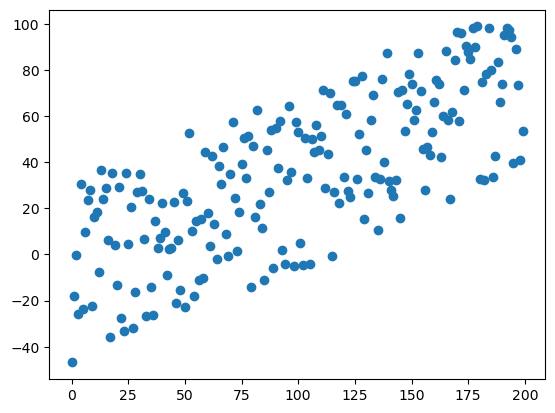

In [84]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(200)
delta = np.random.uniform(-50,30, size=(200,))

y = .4 * x +3 + delta

plt.scatter(x, y)
plt.show()

In [85]:
# Shuffle the data
indices = np.random.permutation(len(x))
x_shuffled = x[indices]
y_shuffled = y[indices]

# Splitting data into training and testing sets
train_size = int(0.8 * len(x))
x_train, x_test = x_shuffled [:train_size], x_shuffled [train_size:]
y_train, y_test = y_shuffled[:train_size], y_shuffled[train_size:]


In [86]:
# Initialize the parameters
w = 0
b = 0
alpha = 0.0001
num_iterations = 1000

<h3>Implemented the gradient descent function from scratch:</h3>

In [87]:
def gradient_descent(x, y, w , b , alpha, iterations): 
    # Number of training examples
    m = len(x)
    
    dw = 0
    db = 0
        
    for i in range(iterations):
        # Compute gradients
        dw = np.sum((w * x + b - y) * x) / m
        db = np.sum(w * x + b - y) / m
        
        # Update the parameters
        w -= alpha * dw
        b -= alpha * db
        
    return w, b

<h3>Train the model:</h3>

In [88]:

w, b = gradient_descent(x_train, y_train, w , b, alpha, num_iterations)


In [89]:

# Define the function to compute y values given x values and parameters w, b
def predict(x, w, b):
    return w * x + b

<h3>Implemented the mean squared error function from scratch:</h3>

In [90]:
def MSE(y_true, y_pred): 
    
    # number of training examples
    m = len(y_true)

    total_cost = 0
    
    for i in range(m):
        squared_error=(y_true[i] - y_pred[i])**2
        total_cost += squared_error

    # divide by 2m to get average cost
    total_cost /= (2*m)
    
   

    return total_cost

<h3>Implemented the R_squared function from scratch:</h3>

In [91]:
def R_squared(y_actual, y_predicted):
    # Calculate the mean of the actual target variable
    y_mean = np.mean(y_actual)
    
    # Calculate the total sum of squares (TSS)
    TSS = np.sum((y_actual - y_mean)**2)
    
    # Calculate the sum of squares of residuals (SSR)
    SSR = np.sum((y_predicted - y_mean)**2)
    
    # Calculate the coefficient of determination (R^2)
    R_squared = 1 - (SSR / TSS)
    
    return R_squared


rs=R_squared(y_test,y_test_pred)

<h3>Evaluate the model:</h3>

In [92]:
# Compute the predictions for the training and testing sets
y_train_pred = predict(x_train, w, b)
y_test_pred = predict(x_test, w, b)

In [93]:
# Calculate the mean squared error on the testing set
test_mse = MSE(y_test, y_test_pred)


In [94]:
# Print the coefficients 
print("Weights: {} \nBias: {}".format(w, b))


Weights: 0.3775073916615925 
Bias: -0.22585453390042837


In [95]:
# print the mean squared error
print('Test MSE:', test_mse)

Test MSE: 185.63228632165323


In [96]:
# print the R_squared
print('Test R^2:', rs)

Test R^2: 0.546131790083493


<h3>Plot the line:</h3>

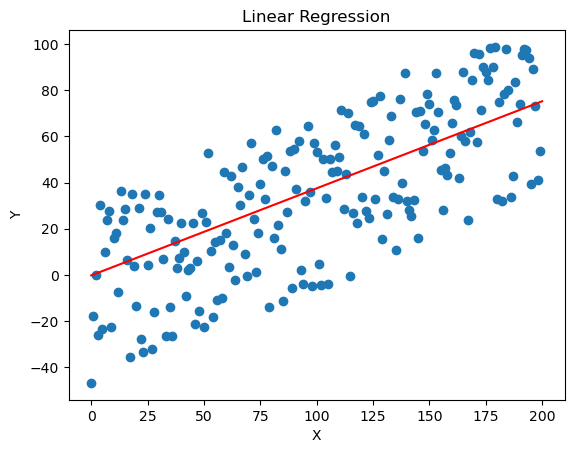

In [97]:
# Plot the scatter plot of the data
plt.scatter(x, y)

# Plot the line of linear regression
x_line = np.linspace(0, 200, 1000)
y_line = w * x_line + b
plt.plot(x_line, y_line, color='red')

# Add title and labels
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

